# Weather Forecasting Game
## A Comparative Analysis Using Linear Regression, Random Forest, and Neural Network Regressors


In this project, we aim to evaluate various regression models using a 2023 dataset to find the most effective method for future forecasting. Our objectives include testing different models to assess their predictive capabilities, employing metrics like MSE and RMSE for performance evaluation, and identifying key features that impact predictions. We will also tune hyperparameters to enhance model performance and select the most efficient model for deployment. The ultimate goal is to implement the optimal model to improve forecasts for 2024. Our methodology involves preparing and segmenting data, training models, documenting performance, and fine-tuning the models based on their efficacy and feature impacts. By the end of this project, we expect to have identified the most accurate and efficient regression model, equipped with a thorough understanding of the influential features and optimal configurations.








In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import glob
from datetime import datetime

#### Data Preprocessing:
In the preprocessing phase of our project, we started by importing all the weekly forecasts from 2023 and concatenating them into a single DataFrame. Next, we imported the Vlinder dataset, which contains measured temperatures for the same period; these temperatures serve as the target variable for our model. We then merged the two datasets based on the datetime column, ensuring that each row displays the forecasted features alongside the corresponding measured temperature at that specific time. This setup prepares our data for further analysis and modeling by aligning our features with our target outcomes.








In [2]:
# Load forecast data files
path = 'Dataset_2023/'
all_files = glob.glob(path + "Forecast_*.csv")  

# Read each file and concatenate into a single DataFrame
forecast_data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
# Convert datetime columns
forecast_data['time'] = pd.to_datetime(forecast_data['time'])

forecast_data['t2m']=forecast_data['t2m']- 273.15
forecast_data

,time,number,latitude,longitude,cape,sp,tcw,sshf,slhf,msl,...,skt,cin,sm,st,sd,sf,tcc,tp,mx2t6,mn2t6
0,2023-02-01,1,50.75,4.25,61.072380,101409.610,10.740416,99.5,-80.0,102353.240,...,277.56506,0.000153,366.63710,278.04790,0.0,2.384186e-07,99.999405,0.000000,NaN,NaN
1,2023-02-01,2,50.75,4.25,16.960354,101399.960,10.368865,99.5,-80.0,102342.380,...,278.52225,NaN,364.48074,278.49686,0.0,2.384186e-07,92.580170,0.000000,NaN,NaN
2,2023-02-01,3,50.75,4.25,17.881620,101344.010,10.001967,99.5,-80.0,102286.620,...,277.16020,NaN,367.23358,278.13834,0.0,2.384186e-07,88.251015,0.000000,NaN,NaN
3,2023-02-01,4,50.75,4.25,3.526485,101409.610,9.796917,99.5,-80.0,102352.700,...,277.28677,NaN,364.84122,277.96875,0.0,2.384186e-07,87.652840,0.000000,NaN,NaN
4,2023-02-01,5,50.75,4.25,11.259079,101391.610,9.756372,99.5,-80.0,102334.010,...,278.17770,NaN,365.96143,278.26428,0.0,2.384186e-07,99.880380,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88445,2023-07-07,46,50.75,4.25,0.000000,101233.460,14.589812,-16156415.0,-69784060.0,102098.090,...,283.57922,NaN,267.03625,290.64008,0.0,0.000000e+00,0.000000,10.132317,293.20685,285.41187
88446,2023-07-07,47,50.75,4.25,8.890320,101112.016,22.093838,-21840656.0,-65307064.0,101972.410,...,287.58844,-7.350601,220.22717,291.70862,0.0,0.000000e+00,64.499730,6.068488,294.16190,288.86682
88447,2023-07-07,48,50.75,4.25,0.000000,101039.340,21.153736,-18487710.0,-67841460.0,101893.620,...,287.27180,NaN,254.99454,291.69858,0.0,0.000000e+00,0.000000,12.224186,296.15073,289.39175
88448,2023-07-07,49,50.75,4.25,0.000000,101245.240,19.395767,-17201248.0,-62672096.0,102105.445,...,285.15800,NaN,278.80988,291.07452,0.0,0.000000e+00,0.018311,20.721334,293.72720,286.95187


In [3]:
# Load Vlinder data
vlinder_data = pd.read_csv('Dataset_2023/vlinder19_2023.csv')
vlinder_data['datetime'] = pd.to_datetime(vlinder_data['datetime'])
vlinder_data

,temp,datetime
0,15.7,2023-01-01 00:00:00
1,15.6,2023-01-01 00:05:00
2,15.6,2023-01-01 00:10:00
3,15.5,2023-01-01 00:15:00
4,15.5,2023-01-01 00:20:00
...,...,...
104597,9.1,2023-12-30 23:40:00
104598,9.0,2023-12-30 23:45:00
104599,9.0,2023-12-30 23:50:00
104600,8.9,2023-12-30 23:55:00


In [4]:
# Merge datasets on the datetime columns
data = pd.merge_asof(forecast_data.sort_values('time'), vlinder_data.sort_values('datetime'), left_on='time', right_on='datetime', direction='nearest')
data

,time,number,latitude,longitude,cape,sp,tcw,sshf,slhf,msl,...,sm,st,sd,sf,tcc,tp,mx2t6,mn2t6,temp,datetime
0,2023-02-01,1,50.75,4.25,61.072380,101409.610,10.740416,99.5,-80.0,102353.240,...,366.63710,278.04790,0.0,2.384186e-07,99.999405,0.000000,NaN,NaN,6.0,2023-02-01
1,2023-02-01,28,50.75,4.25,13.732903,101381.770,9.731780,99.5,-80.0,102326.170,...,367.42755,277.72678,0.0,2.384186e-07,82.492035,0.000000,NaN,NaN,6.0,2023-02-01
2,2023-02-01,29,50.75,4.25,39.736767,101421.484,10.473551,99.5,-80.0,102367.710,...,365.71250,278.16490,0.0,2.384186e-07,82.115120,0.000000,NaN,NaN,6.0,2023-02-01
3,2023-02-01,30,50.75,4.25,32.167282,101371.100,10.302399,99.5,-80.0,102313.610,...,362.59756,278.85626,0.0,2.384186e-07,98.961750,0.000000,NaN,NaN,6.0,2023-02-01
4,2023-02-01,31,50.75,4.25,58.039753,101377.590,10.323003,99.5,-80.0,102321.290,...,366.68073,278.31046,0.0,2.384186e-07,95.708400,0.000000,NaN,NaN,6.0,2023-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88445,2023-07-07,20,50.75,4.25,0.000000,101305.875,15.492667,-16413501.0,-66488300.0,102167.470,...,280.03708,290.24515,0.0,0.000000e+00,0.000000,19.842358,292.87920,285.90112,17.5,2023-07-07
88446,2023-07-07,21,50.75,4.25,0.000000,101139.086,24.249985,-25520240.0,-57869970.0,101998.200,...,202.88474,291.71527,0.0,0.000000e+00,0.584446,6.819519,294.90670,287.40240,17.5,2023-07-07
88447,2023-07-07,22,50.75,4.25,0.000000,101138.380,25.729910,-16826180.0,-64280210.0,101997.945,...,250.58415,291.26083,0.0,0.000000e+00,10.692478,7.399574,294.36798,287.96848,17.5,2023-07-07
88448,2023-07-07,12,50.75,4.25,138.721310,100739.500,29.523367,-19495964.0,-63400716.0,101594.586,...,229.89012,293.27335,0.0,0.000000e+00,37.850178,4.468890,296.44330,290.78420,17.5,2023-07-07


## Data Cleaning and Analysis

In this part of the notebook, we focus on identifying and handling missing data within our dataset, followed by analyzing the correlations between different features.

### Visualizing Missing Values

First, we use a heatmap to visually inspect where missing values occur in the dataset:
- **Missing Values Heatmap:** Displays each column with any missing values as yellow lines, showing us at a glance which parts of our data need attention.

### Calculating Missing Data

Next, we calculate the percentage of missing values for each column:
- **Percentage of Missing Values:** This tells us how much of each column's data is missing, helping us decide whether to keep or drop these columns.

### Displaying Columns with Missing Data

We list columns that have missing values:
- **Columns with Missing Values:** Identifying these columns allows us to address the gaps either by filling them or considering their removal.

### Correlation Analysis

After addressing missing data, we examine the correlations between variables:
- **Correlation Heatmap:** A visual representation that helps us understand the relationships between different variables. This can influence feature selection for machine learning modeling.
- **Target Variable Correlations:** Specifically, we look at how each variable correlates with 'temp'.

### Data Cleaning

Finally, we make our dataset cleaner:
- **Removing Specific Columns and Rows:** We drop columns or rows based on the extent of missing data or their relevance to our analysis or model.


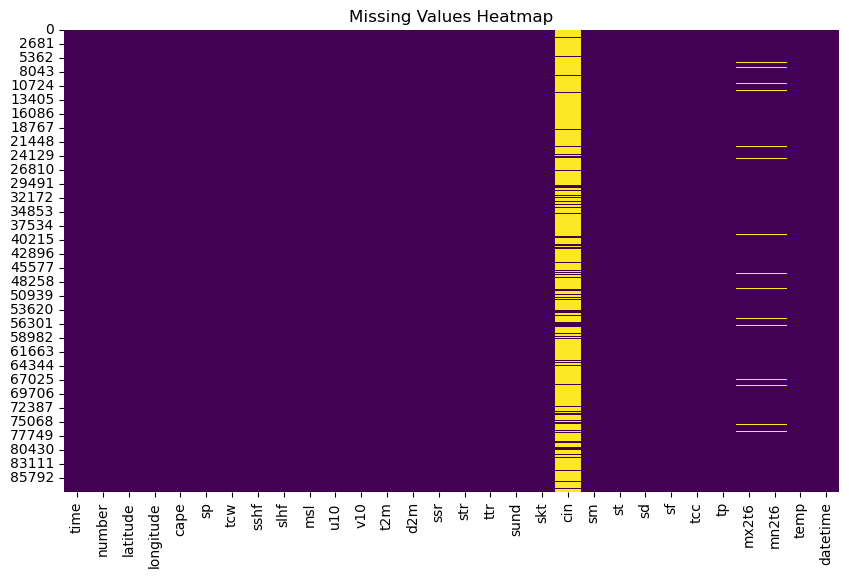

In [5]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



In [6]:
# Percentage of missing values per column
missing_percentage = (data.isna().sum() / len(data)) * 100
print("Percentage of missing values per column:")
print(missing_percentage)
# Display columns with missing values
cols_with_missing = missing_percentage[missing_percentage > 0]
print("\nColumns with missing values:")
print(cols_with_missing)


Percentage of missing values per column:
time          0.000000
number        0.000000
latitude      0.000000
longitude     0.000000
cape          0.000000
sp            0.000000
tcw           0.000000
sshf          0.000000
slhf          0.000000
msl           0.000000
u10           0.000000
v10           0.000000
t2m           0.000000
d2m           0.000000
ssr           0.000000
str           0.000000
ttr           0.000000
sund          0.000000
skt           0.000000
cin          82.553985
sm            0.000000
st            0.000000
sd            0.000000
sf            0.000000
tcc           0.000000
tp            0.000000
mx2t6         3.448276
mn2t6         3.448276
temp          0.000000
datetime      0.000000
dtype: float64

Columns with missing values:
cin      82.553985
mx2t6     3.448276
mn2t6     3.448276
dtype: float64


In [73]:
correlation_matrix = data.corr()
correlation_matrix.round(2)
correlation_matrix

,time,number,latitude,longitude,cape,sp,tcw,sshf,slhf,msl,...,sm,st,sd,sf,tcc,tp,mx2t6,mn2t6,temp,datetime
time,1.000000e+00,-3.828614e-15,NaN,NaN,0.114137,-0.187712,0.591234,-0.682535,-0.637354,-0.204367,...,-0.678010,0.905417,-0.118859,-0.143003,-0.196244,-0.004743,0.804026,0.771018,7.965352e-01,1.000000e+00
number,-3.828614e-15,1.000000e+00,NaN,NaN,0.006919,-0.000603,-0.001644,-0.003976,0.000785,-0.000626,...,-0.003839,0.000756,-0.002711,-0.000843,-0.003381,-0.000489,0.000961,-0.000194,-4.573179e-15,-4.462248e-15
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cape,1.141365e-01,6.918560e-03,NaN,NaN,1.000000,-0.098883,0.273748,-0.059478,-0.062661,-0.101610,...,-0.079612,0.168937,-0.015030,-0.011922,0.085997,0.029679,0.187043,0.176316,1.714363e-01,1.141366e-01
sp,-1.877120e-01,-6.029760e-04,NaN,NaN,-0.098883,1.000000,-0.344194,-0.047735,0.113350,0.999766,...,-0.096210,-0.175853,-0.183581,-0.238124,-0.275790,-0.335660,-0.196387,-0.260050,-1.524509e-01,-1.877122e-01
tcw,5.912342e-01,-1.644380e-03,NaN,NaN,0.273748,-0.344194,1.000000,-0.294961,-0.342397,-0.358030,...,-0.408872,0.696632,-0.092127,-0.042456,0.253213,0.086395,0.694506,0.747558,6.332880e-01,5.912346e-01
sshf,-6.825347e-01,-3.975824e-03,NaN,NaN,-0.059478,-0.047735,-0.294961,1.000000,0.800722,-0.036585,...,0.644126,-0.619476,0.057753,0.128012,0.244317,0.157519,-0.570273,-0.512180,-5.848474e-01,-6.825346e-01
slhf,-6.373543e-01,7.850082e-04,NaN,NaN,-0.062661,0.113350,-0.342397,0.800722,1.000000,0.123554,...,0.426971,-0.582290,0.076436,0.083681,0.144405,-0.232608,-0.538533,-0.514621,-5.272306e-01,-6.373543e-01
msl,-2.043668e-01,-6.260160e-04,NaN,NaN,-0.101610,0.999766,-0.358030,-0.036585,0.123554,1.000000,...,-0.081871,-0.194618,-0.178716,-0.233934,-0.272582,-0.332763,-0.215234,-0.278038,-1.701123e-01,-2.043669e-01


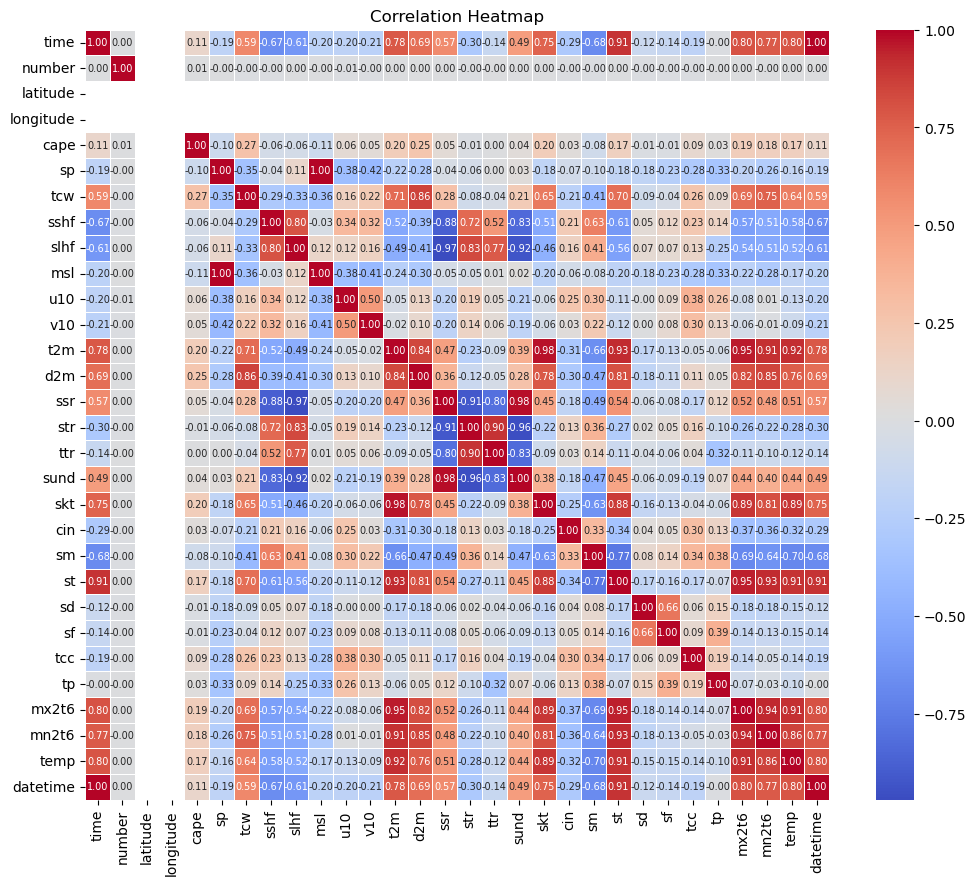

In [10]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 7}, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
target_correlations = correlation_matrix['temp'].abs().sort_values(ascending=False)
print(target_correlations)


temp         1.000000e+00
t2m          9.213671e-01
mx2t6        9.116766e-01
st           9.074425e-01
skt          8.944752e-01
mn2t6        8.561178e-01
time         7.962513e-01
datetime     7.962512e-01
d2m          7.614516e-01
sm           6.963284e-01
tcw          6.356666e-01
sshf         5.772502e-01
slhf         5.161706e-01
ssr          5.107125e-01
sund         4.400212e-01
cin          3.203856e-01
str          2.777280e-01
msl          1.729418e-01
cape         1.695355e-01
sp           1.553495e-01
sf           1.464534e-01
sd           1.462747e-01
tcc          1.355706e-01
u10          1.278996e-01
ttr          1.195173e-01
tp           9.611925e-02
v10          9.356555e-02
number       1.761450e-15
latitude              NaN
longitude             NaN
Name: temp, dtype: float64


In [12]:
data.drop('cin', axis=1, inplace=True)
data = data.dropna() #drop the rows with NAN values.
data

,time,number,latitude,longitude,cape,sp,tcw,sshf,slhf,msl,...,sm,st,sd,sf,tcc,tp,mx2t6,mn2t6,temp,datetime
50,2023-02-01 06:00:00,36,50.75,4.25,0.00000,101422.510,8.786953,1097535.5,-190355.5,102373.650,...,363.62080,277.33194,0.0,2.384186e-07,73.295050,0.090626,278.30984,276.35196,4.1,2023-02-01 06:00:00
51,2023-02-01 06:00:00,35,50.75,4.25,0.00000,101357.270,8.116966,1198127.0,-312171.0,102305.970,...,368.12585,276.86142,0.0,2.384186e-07,98.401720,0.117329,278.60950,276.67206,4.1,2023-02-01 06:00:00
52,2023-02-01 06:00:00,34,50.75,4.25,0.00000,101389.470,8.423046,1338834.0,-330930.5,102338.550,...,365.70926,277.10608,0.0,2.384186e-07,64.940410,0.000000,277.29874,276.33783,4.1,2023-02-01 06:00:00
53,2023-02-01 06:00:00,33,50.75,4.25,0.00000,101367.016,7.831823,1083626.0,-294629.5,102317.330,...,363.05017,277.68390,0.0,2.384186e-07,75.693860,0.052325,279.32507,276.52438,4.1,2023-02-01 06:00:00
54,2023-02-01 06:00:00,28,50.75,4.25,0.00000,101422.414,8.779641,1274326.5,-240543.5,102371.860,...,366.78903,276.87240,0.0,2.384186e-07,82.354690,0.005934,278.46830,276.66006,4.1,2023-02-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88445,2023-07-07 00:00:00,20,50.75,4.25,0.00000,101305.875,15.492667,-16413501.0,-66488300.0,102167.470,...,280.03708,290.24515,0.0,0.000000e+00,0.000000,19.842358,292.87920,285.90112,17.5,2023-07-07 00:00:00
88446,2023-07-07 00:00:00,21,50.75,4.25,0.00000,101139.086,24.249985,-25520240.0,-57869970.0,101998.200,...,202.88474,291.71527,0.0,0.000000e+00,0.584446,6.819519,294.90670,287.40240,17.5,2023-07-07 00:00:00
88447,2023-07-07 00:00:00,22,50.75,4.25,0.00000,101138.380,25.729910,-16826180.0,-64280210.0,101997.945,...,250.58415,291.26083,0.0,0.000000e+00,10.692478,7.399574,294.36798,287.96848,17.5,2023-07-07 00:00:00
88448,2023-07-07 00:00:00,12,50.75,4.25,138.72131,100739.500,29.523367,-19495964.0,-63400716.0,101594.586,...,229.89012,293.27335,0.0,0.000000e+00,37.850178,4.468890,296.44330,290.78420,17.5,2023-07-07 00:00:00


# Features and Target selection and dataset splitting
The process starts with dividing the dataset into training, validation, and testing sets to ensure a comprehensive evaluation of the model.

In [13]:
columns_to_exclude = ['time', 'datetime','number','latitude','longitude']
data_model = data.drop(columns=columns_to_exclude)
target = data_model['temp']
features = data_model.drop('temp', axis=1)
# Split the data into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(features,target,  test_size=0.1, random_state=42)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)



# Linear Regression:
This section applies linear regression to predict temperature based on key variables identified earlier. We'll fit the model to our dataset and evaluate its performance.


#### Recursive Feature Elimination (RFE):
This section of the notebook outlines the implementation of a linear regression model using the scikit-learn library to predict temperature based on selected features. It employs Recursive Feature Elimination (RFE) to pinpoint the most influential features for the prediction task. RFE involves fitting the model multiple times with varying numbers of features, each time selecting the configuration that yields the lowest validation MSE (Mean Squared Error). The optimal number of features and their corresponding MSE values are reported. 

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Features Selection for Linear Regression:  

In [15]:
# Initialize the linear regression model
lr_model = LinearRegression()

# Variables to track the best configuration
best_num_features = 0
best_mse = np.inf
best_features_lr = None

# Testing different numbers of features
for n_features in range(1, len(X_train.columns) + 1):
    selector = RFE(lr_model, n_features_to_select=n_features)
    selector.fit(X_train, y_train)
    
    selected_features = X_train.columns[selector.support_]
    lr_model.fit(X_train[selected_features], y_train)
    val_predictions = lr_model.predict(X_val[selected_features])
    val_mse = mean_squared_error(y_val, val_predictions)
    
    if val_mse < best_mse:
        best_mse = val_mse
        best_num_features = n_features
        best_features_lr = selected_features

print(f"Best number of features: {best_num_features}")
print(f"Selected features: {best_features_lr}")
print(f"Lowest validation MSE: {best_mse}")
rmse_lr = np.sqrt(best_mse)
print(f" RMSE: {rmse_lr}")

    

Best number of features: 18
Selected features: Index(['cape', 'sp', 'tcw', 'msl', 'u10', 'v10', 't2m', 'd2m', 'sund', 'skt',
       'sm', 'st', 'sd', 'sf', 'tcc', 'tp', 'mx2t6', 'mn2t6'],
      dtype='object')
Lowest validation MSE: 5.52427822301759
 RMSE: 2.3503783148713717


#### Since we already evaluated the model with the validation dataset we will train the final model of linear regression on the training + validation dataset for better dataset exploitation and we will test it in the end of notebook with the test dataset to evaluate the model

In [17]:
# Initialize the linear regression model
final_lr_model = LinearRegression()

# Train the model
final_lr_model.fit(X_train_val[best_features_lr], y_train_val)


LinearRegression()

# Random Forest Regressor:
In this section, we utilize the Random Forest Regressor from sklearn.ensemble to predict temperature from key predictors. We fit the model, fine-tune its hyperparameters using grid search and cross-validation, and assess feature importance. The model's performance is evaluated with MSE and RMSE. Visualizations of feature importance help elucidate which variables most significantly impact temperature predictions.

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Initialize and train the Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

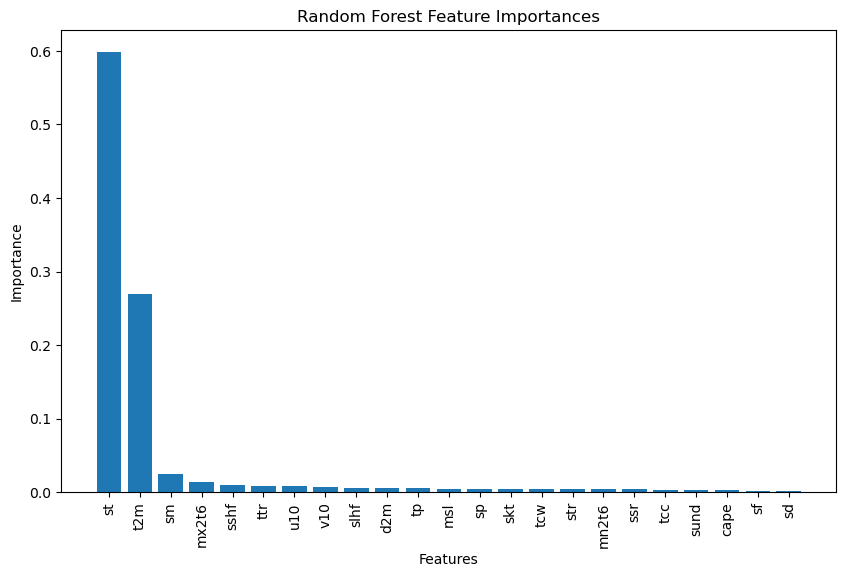

In [20]:
#Evaluate Feature Importance
# Get feature importance
rf_importances = rf_model.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importances')
plt.bar(range(X_train.shape[1]), rf_importances[rf_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[rf_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [21]:
#Model Evaluation

predictions_rf_val = rf_model.predict(X_val)

# Calculate the mean squared error
mse_rf_val = mean_squared_error(y_val, predictions_rf_val)
print(f'Mean Squared Error: {mse_rf_val}')


Mean Squared Error: 1.5894237819411932


## Utilizing Pre-selected Best Features for RandomForest

To optimize computational efficiency, particularly when working with large datasets, you can use the following pre-selected set of best features. These features were identified as the most effective during an initial feature selection phase and can be used directly, allowing you to skip the feature selection process and move straight to model training.

### Pre-selected Best Features
Below is the list of best features to use:

```python
best_features_rf = [
    'cape', 'sp', 'tcw', 'sshf', 'slhf', 'msl', 'u10', 'v10', 't2m', 'd2m',
    'ssr', 'str', 'ttr', 'sund', 'skt', 'sm', 'st', 'sf', 'tcc', 'tp',
    'mx2t6', 'mn2t6'
]


In [67]:
best_features_rf = ['cape', 'sp', 'tcw', 'sshf', 'slhf', 'msl', 'u10', 'v10', 't2m', 'd2m',
       'ssr', 'str', 'ttr', 'sund', 'skt', 'sm', 'st', 'sf', 'tcc', 'tp',
       'mx2t6', 'mn2t6']

# Feature Selection with RandomForest and SelectFromModel

This  demonstrates the process of selecting the optimal number of features in a dataset using the `SelectFromModel` function from `scikit-learn` with a `RandomForestRegressor`. The goal is to identify the number of features that yield the lowest Mean Squared Error (MSE) on a validation dataset, thus enhancing the model's performance.


In [22]:
from sklearn.feature_selection import SelectFromModel

# Initialize the RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Store MSE for each feature count
mse_scores = {}
n_features_list = []

# Test each possible number of features from max to 1
for n_features_to_select in range(len(X_train.columns), 0, -1):
    # Select features based on feature importance directly
    selector = SelectFromModel(rf_model, max_features=n_features_to_select, threshold=-np.inf, prefit=True)
    selected_features = X_train.columns[selector.get_support()]

    if len(selected_features) == 0:
        continue  # Skip if no features are selected

    # Train a new model on the selected features
    rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_selected.fit(X_train[selected_features], y_train)

    # Evaluate on the validation set
    predictions_val_selected = rf_selected.predict(X_val[selected_features])
    mse_val_selected = mean_squared_error(y_val, predictions_val_selected)

    # Store the MSE and associated feature count
    mse_scores[n_features_to_select] = mse_val_selected
    n_features_list.append(n_features_to_select)
    print(f"Feature count: {n_features_to_select}, Validation MSE: {mse_val_selected:.4f}")

# Find the number of features with the lowest MSE
best_n_features = min(mse_scores, key=mse_scores.get)
best_mse = mse_scores[best_n_features]
print(f"Best number of features: {best_n_features}, Lowest Validation MSE: {best_mse:.4f}")

Feature count: 23, Validation MSE: 1.5894
Feature count: 22, Validation MSE: 1.5850
Feature count: 21, Validation MSE: 1.6223
Feature count: 20, Validation MSE: 1.6319
Feature count: 19, Validation MSE: 1.6303
Feature count: 18, Validation MSE: 1.6409
Feature count: 17, Validation MSE: 1.6451
Feature count: 16, Validation MSE: 1.6300
Feature count: 15, Validation MSE: 1.6829
Feature count: 14, Validation MSE: 1.6866
Feature count: 13, Validation MSE: 1.6970
Feature count: 12, Validation MSE: 1.6962
Feature count: 11, Validation MSE: 1.7820
Feature count: 10, Validation MSE: 1.8711
Feature count: 9, Validation MSE: 1.8961
Feature count: 8, Validation MSE: 2.0621
Feature count: 7, Validation MSE: 2.1756
Feature count: 6, Validation MSE: 2.2859
Feature count: 5, Validation MSE: 3.0572
Feature count: 4, Validation MSE: 3.8214
Feature count: 3, Validation MSE: 4.4108
Feature count: 2, Validation MSE: 6.2763
Feature count: 1, Validation MSE: 11.5383
Best number of features: 22, Lowest Valida

## Final Model Training and Evaluation with Selected Features

After determining the optimal number of features, we refine our RandomForest model to focus only on the most influential features. This section outlines the process of retraining the RandomForest model using these selected features and evaluating its performance on the validation dataset. The evaluation metrics include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score to assess both the accuracy and the explanatory power of the model.

### Steps:
1. **Select the Best Features:** Utilize `SelectFromModel` to filter out the best performing features identified in the initial rounds of feature selection.
2. **Model Initialization and Training:** A new `RandomForestRegressor` is initialized and trained solely on the selected features.
3. **Prediction and Initial Evaluation:** The model makes predictions on the validation set, and the MSE is calculated to quantify the prediction error.
4. **Calculation of RMSE:** The RMSE is derived from the MSE to provide an error metric in the same units as the target variable.
5. **Calculation of R² Score:** The R² score is computed to measure how well the variations in the target variable are explained by the model features.


In [23]:
# Select the best features based on previous selection
selector = SelectFromModel(rf_model, max_features=best_n_features, threshold=-np.inf, prefit=True)
best_features_rf = X_train.columns[selector.get_support()]

# Initialize and train the RandomForest model with the selected best features
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X_train[best_features_rf], y_train)

# Predict and evaluate on the validation set using the best selected features
predictions_rf_val = rf_final.predict(X_val[best_features_rf])
rf_mse = mean_squared_error(y_val, predictions_rf_val)
print(f"Validation MSE with best selected features: {rf_mse}")

# Calculate the Root Mean Squared Error for the validation set
rf_rmse = np.sqrt(rf_mse)
print(f"Validation RMSE with best selected features: {rf_rmse}")

# Calculate the R² score for the validation set
rf_r2_score = r2_score(y_val, predictions_rf_val)
print(f"Validation R² score with best selected features: {rf_r2_score}")

Validation MSE with best selected features: 1.5850180689565456
Validation RMSE with best selected features: 1.2589750072803454
Validation R² score with best selected features: 0.965576115766815


## Optimizing the RandomForest Model with GridSearchCV

### Hyperparameters Tuning :

In this section, we fine-tune our RandomForest model to improve its accuracy. We use a tool called GridSearchCV, which helps us find the best settings by testing different combinations of settings.

### Steps:
1. **Prepare Parameter Grid:** We set up a list of different settings to try. These settings include the number of trees in the forest, the maximum number of features to consider at each split, and others.
2. **Set Up GridSearchCV:** We configure GridSearchCV with our RandomForest model and the list of settings. We also tell it to use cross-validation, which helps make our results more reliable.
3. **Run GridSearchCV:** We start the GridSearchCV process, which tests all different combinations of settings on our training data to find the best one.
4. **Check Model Performance:** Once GridSearchCV finds the best model settings, we check how well this optimized model performs on unseen data. We use metrics like MSE (mean squared error), RMSE (root mean squared error), and R² score to understand the model's accuracy.
5. **Plot Results:** Lastly, we make a plot showing actual vs. predicted values to see how close the predictions are to the real data. This plot also includes a diagonal line that represents perfect predictions.

### Results:
- **Best Settings:** GridSearchCV tells us which settings worked best.
- **Accuracy Measures:** We look at the MSE, RMSE, and R² score to measure how accurate the model is.
- **Visualization:** A plot that helps us visually compare the actual values and the model's predictions.

## Using Pre-determined Hyperparameters for RandomForest

To save time on hyperparameter tuning for the RandomForest model, especially with large datasets, you can use the following pre-determined best hyperparameters. These values were identified as optimal during an initial tuning process. By using these parameters, you can skip the hyperparameter tuning steps and proceed directly to model training.

### Pre-determined Best Hyperparameters
Below are the best hyperparameters to use:

```python
best_hyperparams = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}


In [65]:
best_hyperparams ={
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Hyperparameters tuning for Random Forest

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Setting up parameter grid for hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 10, 30 , 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [26]:
# Setup GridSearchCV 
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train[best_features_rf], y_train)

# Best model obtained from GridSearchCV
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


In [27]:
# Predict using the best estimator on the validation set
predictions_val = best_rf.predict(X_val[best_features_rf])

# Calculate MSE, RMSE, and R² on the validation set
mse_val = mean_squared_error(y_val, predictions_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, predictions_val)
best_hyperparams = grid_search.best_params_

# Print the best parameters and performance metrics
print(f"Best Hyperparameters: {best_hyperparams}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R² Score: {r2_val}")

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Validation MSE: 1.5458874458756193
Validation RMSE: 1.2433372213022578
Validation R² Score: 0.9664259660400027


#### Since we already evaluated the model with the validation dataset we will train the final model of Random Forest on the training + validation dataset for better dataset exploitation and we will test it in the end of notebook with the test dataset to evaluate the model

In [29]:
# Use the best features and hyperparameters to train on the combined training and validation set
final_rf_model = RandomForestRegressor(**best_hyperparams, random_state=42)

# Train the model using the best features
final_rf_model.fit(X_train_val[best_features_rf], y_train_val)

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=42)

# Neural Network Regressor:

In this section, we apply a Neural Network Regressor from sklearn.neural_network to predict temperature using key predictors. We start by training the model, then optimize it through grid search and cross-validation, focusing on hyperparameters like hidden layers and learning rates. The model’s performance is evaluated with MSE and RMSE. Training and validation loss curves are visualized to understand the model's learning dynamics and predictive stability.

In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


In [31]:
# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Initial model
initial_mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam', random_state=42)
initial_mlp.fit(X_train_scaled, y_train)

MLPRegressor(max_iter=1000, random_state=42)

## Utilizing Pre-selected Best Features for Neural Network Regressor

To optimize computational efficiency, especially when dealing with repetitive tasks or large datasets, you can use the following pre-determined set of best features. These features were identified as the most effective during an initial feature selection phase and can now be used directly, allowing you to skip the feature selection process and move straight to feature scaling.

### Pre-selected Best Features
Below is the list of best features to use:

```python
best_features_nnr = ['ssr', 'st', 'mx2t6', 'ttr', 'skt', 'str', 't2m', 'sund', 'sm', 'slhf',
                     'mn2t6', 'd2m', 'tp', 'u10', 'tcw']


In [64]:
best_features_nnr = ['ssr', 'st', 'mx2t6', 'ttr', 'skt', 'str', 't2m', 'sund', 'sm', 'slhf',
                     'mn2t6', 'd2m', 'tp', 'u10', 'tcw']

# Evaluate feature importance


In [33]:
importances = permutation_importance(initial_mlp, X_val_scaled, y_val, n_repeats=10, random_state=42)
sorted_idx = importances.importances_mean.argsort()[::-1]  # Sort by importance

# Iterative feature selection
mse_scores = []
feature_sets = []

for i in range(1, len(sorted_idx) + 1):
    selected_features = features.columns[sorted_idx[:i]]
    X_train_selected = scaler.fit_transform(X_train[selected_features])
    X_val_selected = scaler.transform(X_val[selected_features])

    model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', solver='adam', random_state=42)
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_val_selected)
    mse = mean_squared_error(y_val, predictions)
    
    mse_scores.append(mse)
    feature_sets.append(selected_features)

# Identify the optimal feature set
min_mse_index = np.argmin(mse_scores)
best_features_nnr = feature_sets[min_mse_index]
optimal_mse = mse_scores[min_mse_index]


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\an

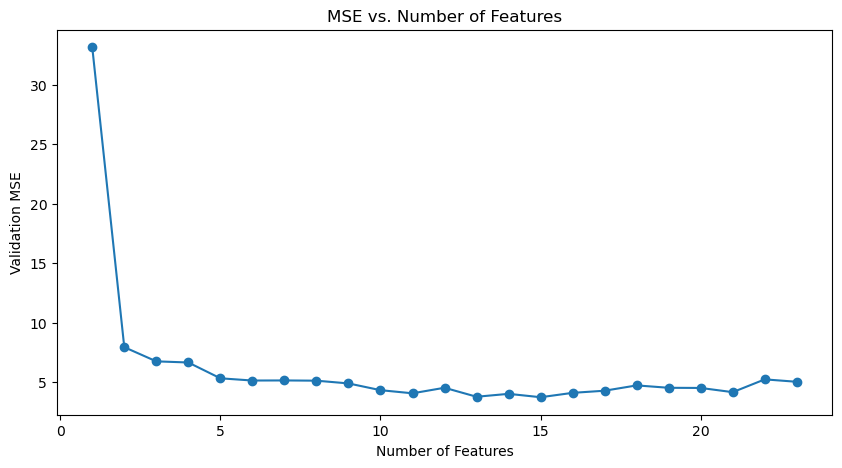

In [34]:
# Plotting MSE vs. Number of Features
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(sorted_idx) + 1), mse_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Validation MSE')
plt.title('MSE vs. Number of Features')
plt.show()

In [35]:
# Hyperparameter Tuning with Optimal Features
X_train_optimal = scaler.fit_transform(X_train[best_features_nnr])
X_val_optimal = scaler.transform(X_val[best_features_nnr])
X_train_val_scaled = scaler.fit_transform(X_train_val[best_features_nnr])
X_test_optimal = scaler.transform(X_test[best_features_nnr])

## Using Pre-determined Hyperparameters for Efficiency

Since hyperparameter tuning is computationally intensive, especially with large datasets (80k rows), you can use the following hardcoded hyperparameters. These parameters were identified as the best during an initial tuning process using `RandomizedSearchCV`. By using these pre-set values, you can skip the detailed hyperparameter tuning steps below and save significant time.

### Hardcoded Best Hyperparameters
Below are the hyperparameters found to be most effective:

```python
best_params = {'activation': 'tanh', 'batch_size': 32, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.0007070342476866847, 'max_iter': 2000, 'solver': 'adam'}


In [62]:
best_params={'activation': 'tanh', 'batch_size': 32, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.0007070342476866847, 'max_iter': 2000, 'solver': 'adam'}

## hyperparameters tuning for neural network regressor using `RandomizedSearchCV`

In [36]:
param_dist = {
    'hidden_layer_sizes': [(100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': uniform(0.0001, 0.001),
    'max_iter': [2000],
    'batch_size': [32, 64, 128]
}


In [37]:
random_search = RandomizedSearchCV(
    estimator=MLPRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42
)
random_search.fit(X_train_optimal, y_train)

# Best hyperparameters
best_params = random_search.best_params_
best_mlp = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0008319939418114052, max_iter=2000, solver=adam; total time= 4.2min


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0008319939418114052, max_iter=2000, solver=adam; total time=   5.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0008319939418114052, max_iter=2000, solver=adam; total time=   0.9s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0008319939418114052, max_iter=2000, solver=adam; total time=  11.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0008319939418114052, max_iter=2000, solver=adam; total time=  25.8s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(100,), learning_rate_init=0.0002559945203362027, max_iter=2000, solver=adam; total time=   5.9s
[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(100,), learning_rate_init=0.0002559945203362027, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(100,), learning_rate_init=0.0002559945203362027, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(100,), learning_rate_init=0.0002559945203362027, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=128, hidden_layer_sizes=(100,), learning_rate_init=0.0002559945203362027, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(100, 100), learning_rate_init=0.0002428668179219408, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(100, 100), learning_rate_init=0.0002428668179219408, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(100, 100), learning_rate_init=0.0002428668179219408, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(100, 100), learning_rate_init=0.0002428668179219408, max_iter=2000, solver=adam; total time=   0.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(100, 100), learning_rate_init=0.0002428668179219408, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(100,), learning_rate_init=0.0008219987722668248, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(100,), learning_rate_init=0.0008219987722668248, max_iter=2000, solver=sgd; total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(100,), learning_rate_init=0.0008219987722668248, max_iter=2000, solver=sgd; total time=   3.4s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(100,), learning_rate_init=0.0008219987722668248, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(100,), learning_rate_init=0.0008219987722668248, max_iter=2000, solver=sgd; total time=   0.0s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100, 100), learning_rate_init=0.0010922115592912176, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100, 100), learning_rate_init=0.0010922115592912176, max_iter=2000, solver=adam; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100, 100), learning_rate_init=0.0010922115592912176, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100, 100), learning_rate_init=0.0010922115592912176, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100, 100), learning_rate_init=0.0010922115592912176, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(50,), learning_rate_init=0.0005319450186421158, max_iter=2000, solver=adam; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(50,), learning_rate_init=0.0005319450186421158, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(50,), learning_rate_init=0.0005319450186421158, max_iter=2000, solver=adam; total time=   2.2s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(50,), learning_rate_init=0.0005319450186421158, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(50,), learning_rate_init=0.0005319450186421158, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(150,), learning_rate_init=0.00023949386065204184, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(150,), learning_rate_init=0.00023949386065204184, max_iter=2000, solver=sgd; total time=   0.1s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(150,), learning_rate_init=0.00023949386065204184, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(150,), learning_rate_init=0.00023949386065204184, max_iter=2000, solver=sgd; total time=   0.1s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(150,), learning_rate_init=0.00023949386065204184, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0008851759613930137, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0008851759613930137, max_iter=2000, solver=adam; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0008851759613930137, max_iter=2000, solver=adam; total time=   2.2s
[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0008851759613930137, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0008851759613930137, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0009599404067363206, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0009599404067363206, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0009599404067363206, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0009599404067363206, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0009599404067363206, max_iter=2000, solver=adam; total time=   1.5s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.00011326496115986653, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.00011326496115986653, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.00011326496115986653, max_iter=2000, solver=adam; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.00011326496115986653, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.00011326496115986653, max_iter=2000, solver=adam; total time=  13.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0004046137691733707, max_iter=2000, solver=adam; total time=   1.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0004046137691733707, max_iter=2000, solver=adam; total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0004046137691733707, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0004046137691733707, max_iter=2000, solver=adam; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0004046137691733707, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(100, 100), learning_rate_init=0.00022203823484477883, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(100, 100), learning_rate_init=0.00022203823484477883, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(100, 100), learning_rate_init=0.00022203823484477883, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(100, 100), learning_rate_init=0.00022203823484477883, max_iter=2000, solver=adam; total time=   0.0s
[CV] END activation=tanh, batch_size=128, hidden_layer_sizes=(100, 100), learning_rate_init=0.00022203823484477883, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(100,), learning_rate_init=0.0004910606075732408, max_iter=2000, solver=sgd; total time=   0.0s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(100,), learning_rate_init=0.0004910606075732408, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(100,), learning_rate_init=0.0004910606075732408, max_iter=2000, solver=sgd; total time=   3.7s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(100,), learning_rate_init=0.0004910606075732408, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(100,), learning_rate_init=0.0004910606075732408, max_iter=2000, solver=sgd; total time=   0.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.00030794166286818883, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.00030794166286818883, max_iter=2000, solver=sgd; total time=   0.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.00030794166286818883, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.00030794166286818883, max_iter=2000, solver=sgd; total time=   0.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.00030794166286818883, max_iter=2000, solver=sgd; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0009422847745949985, max_iter=2000, solver=sgd; total time=   0.1s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0009422847745949985, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0009422847745949985, max_iter=2000, solver=sgd; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0009422847745949985, max_iter=2000, solver=sgd; total time=   4.6s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0009422847745949985, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0010266588657937943, max_iter=2000, solver=adam; total time=   0.0s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0010266588657937943, max_iter=2000, solver=adam; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0010266588657937943, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0010266588657937943, max_iter=2000, solver=adam; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(100,), learning_rate_init=0.0010266588657937943, max_iter=2000, solver=adam; total time=   0.1s
[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(150,), learning_rate_init=0.0006208342600258237, max_iter=2000, solver=sgd; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(150,), learning_rate_init=0.0006208342600258237, max_iter=2000, solver=sgd; total time=   0.1s
[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(150,), learning_rate_init=0.0006208342600258237, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(150,), learning_rate_init=0.0006208342600258237, max_iter=2000, solver=sgd; total time=   0.1s
[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(150,), learning_rate_init=0.0006208342600258237, max_iter=2000, solver=sgd; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(100,), learning_rate_init=0.0006396921323890798, max_iter=2000, solver=sgd; total time=   0.0s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(100,), learning_rate_init=0.0006396921323890798, max_iter=2000, solver=sgd; total time=  10.5s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(100,), learning_rate_init=0.0006396921323890798, max_iter=2000, solver=sgd; total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(100,), learning_rate_init=0.0006396921323890798, max_iter=2000, solver=sgd; total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(100,), learning_rate_init=0.0006396921323890798, max_iter=2000, solver=sgd; total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(100, 100), learning_rate_init=0.0007070342476866847, max_iter=2000, solver=adam; total time=   4.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(100, 100), learning_rate_init=0.0007070342476866847, max_iter=2000, solver=adam; total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(100, 100), learning_rate_init=0.0007070342476866847, max_iter=2000, solver=adam; total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(100, 100), learning_rate_init=0.0007070342476866847, max_iter=2000, solver=adam; total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(100, 100), learning_rate_init=0.0007070342476866847, max_iter=2000, solver=adam; total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0002652669390630025, max_iter=2000, solver=adam; total time=   0.1s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0002652669390630025, max_iter=2000, solver=adam; total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0002652669390630025, max_iter=2000, solver=adam; total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0002652669390630025, max_iter=2000, solver=adam; total time=   0.3s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(150,), learning_rate_init=0.0002652669390630025, max_iter=2000, solver=adam; total time=   0.2s


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [49]:
# Validation Performance
predictions = best_mlp.predict(X_val_optimal)
mse = mean_squared_error(y_val, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, predictions)

print("Best Hyperparameters:", best_params)
print("Validation MSE:", mse)
print("Validation RMSE:", rmse)
print("Validation R² score:", r2)


Best Hyperparameters: {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0006396921323890798, 'max_iter': 2000, 'solver': 'sgd'}
Validation MSE: 4.663231631279914
Validation RMSE: 2.1594516969082487
Validation R² score: 0.89872257675057


#### Since we already evaluated the model with the validation dataset we will train the final model of NNR on the training + validation dataset for better dataset exploitation and we will test it in the end of notebook with the test dataset to evaluate the model

In [50]:
# Initialize the final model with the best hyperparameters
final_nnr_model = MLPRegressor(**best_params, random_state=42)
# Train the final model on the scaled combined training and validation data
final_nnr_model.fit(X_train_val_scaled, y_train_val)


MLPRegressor(activation='tanh', batch_size=32, hidden_layer_sizes=(100, 100),
             learning_rate_init=0.0007070342476866847, max_iter=2000,
             random_state=42)

## Model Evaluation and Comparison

### Overview
We assess the performance of three predictive models: Neural Network Regressor (NNR), Linear Regression (LR), and Random Forest Regressor (RF) using test data.

### Steps
1. **Performance Metrics:** Calculate MSE, RMSE, and R² for each model to evaluate accuracy and fit.
2. **Visualization:** Display these metrics in bar charts for each model to visually compare their effectiveness.
3. **Best Model Selection:** Determine the best performing model based on R² and RMSE.



In [74]:
# Model Predictions
predictions_nnr = final_nnr_model.predict(X_test_optimal)
predictions_lr = final_lr_model.predict(X_test[best_features_lr])
predictions_rf = final_rf_model.predict(X_test[best_features_rf])

from joblib import dump

dump(final_nnr_model, 'final_nnr_model.pkl')
dump(final_lr_model, 'final_lr_model.pkl')
dump(final_rf_model, 'final_rf_model.pkl')


['final_rf_model.pkl']

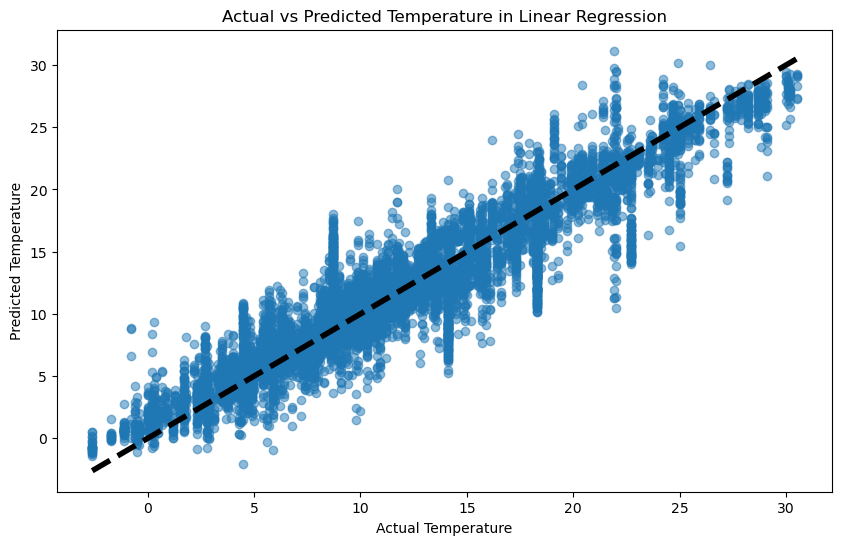

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_lr, alpha=0.5)  
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature in Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  
plt.show()


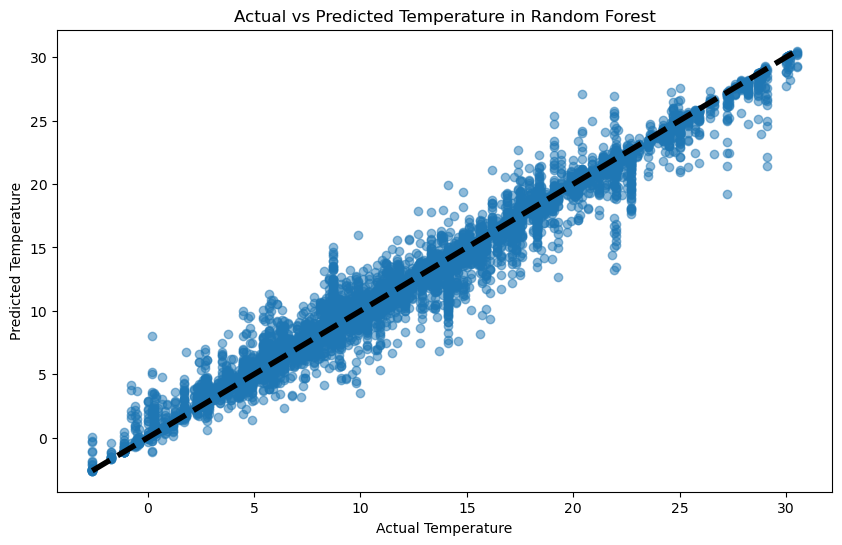

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_rf, alpha=0.5)  
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature in Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  
plt.show()


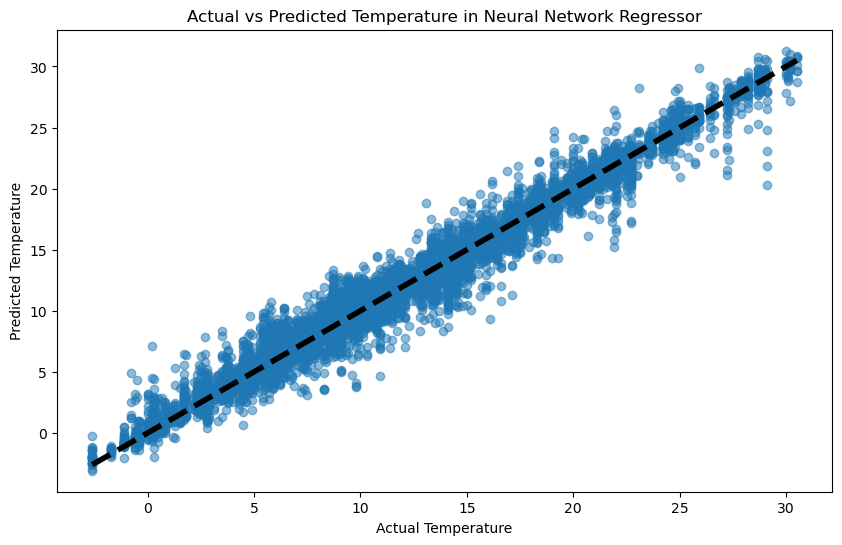

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_nnr, alpha=0.5)  
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature in Neural Network Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  
plt.show()


In [52]:
def calculate_metrics(y_true, predictions):
    mse = mean_squared_error(y_true, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, predictions)
    return mse, rmse, r2

mse_nnr, rmse_nnr, r2_nnr = calculate_metrics(y_test, predictions_nnr)
mse_lr, rmse_lr, r2_lr = calculate_metrics(y_test, predictions_lr)
mse_rf, rmse_rf, r2_rf = calculate_metrics(y_test, predictions_rf)

In [53]:
# Collect all metrics in a DataFrame for easy comparison
results = pd.DataFrame({
    'Model': ['Neural Network Regressor', 'Linear Regression', 'Random Forest Regressor'],
    'MSE': [mse_nnr, mse_lr, mse_rf],
    'RMSE': [rmse_nnr, rmse_lr, rmse_rf],
    'R2': [r2_nnr, r2_lr, r2_rf]
})

print(results)

                      Model       MSE      RMSE        R2
0  Neural Network Regressor  1.413733  1.189005  0.969465
1         Linear Regression  5.858990  2.420535  0.873451
2   Random Forest Regressor  1.422614  1.192734  0.969273


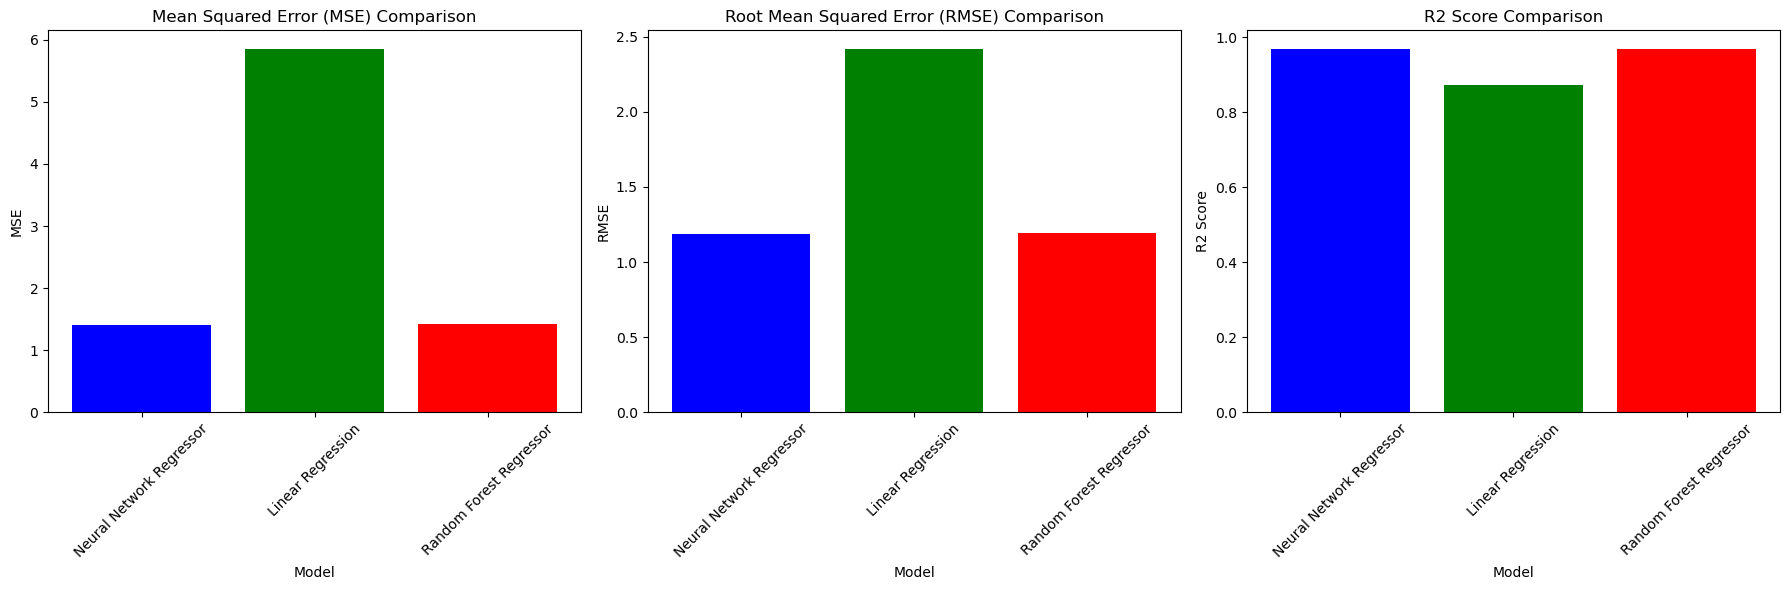

In [54]:
from matplotlib.ticker import FixedLocator

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# MSE Plot
ax[0].bar(results['Model'], results['MSE'], color=['blue', 'green', 'red'])
ax[0].set_title('Mean Squared Error (MSE) Comparison')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Model')
ax[0].set_xticks(range(len(results['Model'])))  
ax[0].set_xticklabels(results['Model'], rotation=45)
ax[0].xaxis.set_major_locator(FixedLocator(range(len(results['Model'])))) 

# RMSE Plot
ax[1].bar(results['Model'], results['RMSE'], color=['blue', 'green', 'red'])
ax[1].set_title('Root Mean Squared Error (RMSE) Comparison')
ax[1].set_ylabel('RMSE')
ax[1].set_xlabel('Model')
ax[1].set_xticks(range(len(results['Model'])))
ax[1].set_xticklabels(results['Model'], rotation=45)
ax[1].xaxis.set_major_locator(FixedLocator(range(len(results['Model']))))  

# R2 Plot
ax[2].bar(results['Model'], results['R2'], color=['blue', 'green', 'red'])
ax[2].set_title('R2 Score Comparison')
ax[2].set_ylabel('R2 Score')
ax[2].set_xlabel('Model')
ax[2].set_xticks(range(len(results['Model'])))
ax[2].set_xticklabels(results['Model'], rotation=45)
ax[2].xaxis.set_major_locator(FixedLocator(range(len(results['Model']))))  

plt.tight_layout()
plt.show()


In [55]:
# Select the best model based on R2 and RMSE
best_model = results.loc[results['R2'].idxmax()]
print(f"The best performing model is {best_model['Model']} with an MSE of {best_model['MSE']}, R2 of {best_model['R2']} and RMSE of {best_model['RMSE']}.")

The best performing model is Neural Network Regressor with an MSE of 1.4137327018820798, R2 of 0.9694646833165388 and RMSE of 1.1890049208821971.


## Correction :
- Loading and preparing forecast data.
- Predicting temperatures using a RandomForest model.
- Calculating and recording prediction quantiles.
- Storing these predictions and quantiles in a CSV.







In [45]:
#Correction
# Load the new forecast data
new_data = pd.read_csv('Dataset_2024/Forecast_27_04_2024.csv')

new_data['time'] = pd.to_datetime(new_data['time'])  # Ensure time is in datetime format
#new_data = new_data[new_data['time'].dt.time != pd.to_datetime('00:00:00').time()]
new_data = new_data.dropna()

In [46]:
# Features used in the RandomForest model
feature_columns = best_features_rf
# Ensure all required features are present in the data
if not all(item in new_data.columns for item in feature_columns):
    raise ValueError("One or more features required for predictions are missing from the data.")

# Extract the features for prediction
features_for_prediction = new_data[feature_columns]

# Predict using the trained RandomForest model
predicted_temp = final_rf_model.predict(features_for_prediction)

# Append predicted temperatures to new_data for quantile calculation
new_data['predicted_temp'] = predicted_temp


In [47]:
# Define  initial forecast time for the horizon calculation
forecast_init_time = datetime.strptime('2024-04-27 00:00:00', '%Y-%m-%d %H:%M:%S')  
# Initialize an empty DataFrame to store the results
result_csv = pd.DataFrame()

# Iterate through each unique forecast time to calculate quantiles
for time in new_data['time'].unique():
    df_time = new_data[new_data['time'] == time]
    horizon_hours = (time - forecast_init_time).total_seconds() / 3600
    corrected_temps = df_time['predicted_temp'].values

    # Calculate quantiles
    quantiles = [np.quantile(corrected_temps, q) for q in [0.025, 0.25, 0.5, 0.75, 0.975]]

    # Define a new row with the quantile calculations
    new_row = {
        'forecast_date': time.strftime('%Y-%m-%d %H:%M:%S'), 
        'target': 't2m', 
        'horizon': f"{int(horizon_hours)} hour",
        'q0.025': quantiles[0], 
        'q0.25': quantiles[1], 
        'q0.5': quantiles[2], 
        'q0.75': quantiles[3], 
        'q0.975': quantiles[4]
    }
    
    # Append the new row to the result DataFrame
    result_csv = pd.concat([result_csv, pd.DataFrame([new_row])], ignore_index=True)



result_csv.to_csv('SamaraFTW.csv', index=False)
result_csv

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
0,2024-04-27 12:00:00,t2m,12 hour,14.896350,14.996500,15.07900,15.200000,15.323800
1,2024-04-27 18:00:00,t2m,18 hour,14.304475,14.484500,14.62000,14.697750,14.867400
2,2024-04-28 00:00:00,t2m,24 hour,13.827000,13.827000,13.82700,13.827000,13.827000
3,2024-04-28 06:00:00,t2m,30 hour,13.266950,13.374500,13.61200,14.168500,14.344000
4,2024-04-28 12:00:00,t2m,36 hour,14.617475,14.869750,15.02575,15.159750,15.380737
5,2024-04-28 18:00:00,t2m,42 hour,13.736500,13.924000,14.01950,14.119000,14.490900
6,2024-04-29 12:00:00,t2m,60 hour,14.301000,14.301000,14.30100,14.301000,14.301000
7,2024-04-29 18:00:00,t2m,66 hour,13.578287,14.553500,15.37550,15.744625,16.516162
8,2024-04-30 00:00:00,t2m,72 hour,13.693550,13.905500,14.14700,14.311750,14.316475
9,2024-04-30 06:00:00,t2m,78 hour,13.673000,13.673000,13.67300,13.673000,13.673000
